**MNIST 손글씨 이미지를 딥러닝을 이용하여 분류하여라.**

In [3]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from IPython.display import display
import pandas as pd

(X, y), (X_test, y_test) = mnist.load_data()
y_train=to_categorical(y)
y_test=to_categorical(y_test)

In [17]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dense(10, activation='softmax'))
net.compile(optimizer='nadam',loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [19]:
net.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 16s 264us/step - loss: 0.2227 - accuracy: 0.9347
Epoch 2/5
60000/60000 [==============================] - 17s 283us/step - loss: 0.0823 - accuracy: 0.9757
Epoch 3/5
60000/60000 [==============================] - 15s 242us/step - loss: 0.0518 - accuracy: 0.9842
Epoch 4/5
60000/60000 [==============================] - 17s 276us/step - loss: 0.0350 - accuracy: 0.9888
Epoch 5/5
60000/60000 [==============================] - 31s 517us/step - loss: 0.0250 - accuracy: 0.9921


In [20]:
test_loss, test_acc = net.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 145us/step


In [21]:
test_acc

0.9814000129699707

**약간의 오버 피팅이 있지만, 괜찮게 피팅이 된 것으로 보입니다.**

**Dropoput**

In [24]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='nadam',loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 17s 285us/step - loss: 0.2800 - accuracy: 0.9168
Epoch 2/5
60000/60000 [==============================] - 17s 285us/step - loss: 0.1354 - accuracy: 0.9597
Epoch 3/5
60000/60000 [==============================] - 19s 321us/step - loss: 0.1073 - accuracy: 0.9666
Epoch 4/5
60000/60000 [==============================] - 19s 310us/step - loss: 0.0857 - accuracy: 0.9725
Epoch 5/5
60000/60000 [==============================] - 17s 287us/step - loss: 0.0792 - accuracy: 0.9751s -


In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 136us/step


In [27]:
test_acc

0.9793999791145325

In [38]:
df = pd.DataFrame(data=np.array([['0.9921 - 0.9814 = 0.0107'], ['|0.9751 - 0.9793| = 0.0042']]), index= ['Original-fitting', 'Dropout-fitting'], columns=['$\Delta$ accuracy=|(train_data_accuracy)-(test_data_accuracy)|'])
display(df)

,$\Delta$ accuracy=|(train_data_accuracy)-(test_data_accuracy)|
Original-fitting,0.9921 - 0.9814 = 0.0107
Dropout-fitting,|0.9751 - 0.9793| = 0.0042


**Dropout을 이용하면, 정확도는 다소 낮아지지만, 오버피팅을 막을 수 있다는 결론 내릴 수 있습니다.**

## **Fashion Mnist**

In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [4]:
(I, j), (I_test, j_test) = fashion_mnist.load_data()
j_train=to_categorical(j)
j_test=to_categorical(j_test)

In [5]:
nel = models.Sequential()
nel.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
nel.add(layers.Dropout(0.5))
nel.add(layers.Dense(10, activation='softmax'))
nel.compile(optimizer='nadam',loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
I_train = I.reshape((60000, 28*28))
I_train = I_train/255

I_test = I_test.reshape((10000, 28*28))
I_test = I_test/255

In [7]:
nel.fit(I_train, j_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 15s 249us/step - loss: 0.5638 - accuracy: 0.7986
Epoch 2/5
60000/60000 [==============================] - 16s 263us/step - loss: 0.4215 - accuracy: 0.8463
Epoch 3/5
60000/60000 [==============================] - 14s 237us/step - loss: 0.3951 - accuracy: 0.8544
Epoch 4/5
60000/60000 [==============================] - 13s 223us/step - loss: 0.3755 - accuracy: 0.8626
Epoch 5/5
60000/60000 [==============================] - 13s 223us/step - loss: 0.3631 - accuracy: 0.8658


**정확도가 낮게 나와서 모델을 좀 더 추가해 보겠습니다.**

In [18]:
nel = models.Sequential()
nel.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
nel.add(layers.MaxPooling2D(pool_size=2))
nel.add(layers.Dropout(0.3))

nel.add(layers.MaxPooling2D(pool_size=2))
nel.add(layers.Dropout(0.3))

nel.add(layers.Flatten())
nel.add(layers.Dense(256, activation='relu'))
nel.add(layers.Dropout(0.5))
nel.add(layers.Dense(10, activation='softmax'))
nel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
(Q_train, w_train), (Q_test, w_test) = fashion_mnist.load_data()          #데이터를 조금 수정해서  다시 불러 오겠습니다.(새로운 모델에 적용시키기 위해)
Q_train = Q_train.astype('float32') / 255
Q_test = Q_test.astype('float32') / 255


e, a = 28, 28
Q_train = Q_train.reshape(Q_train.shape[0], e, a, 1)
Q_test = Q_test.reshape(Q_test.shape[0], e, a, 1)

w_train = to_categorical(w_train, 10)
w_test = to_categorical(w_test, 10)

In [27]:
nel.fit(Q_train, w_train, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.5436 - accuracy: 0.8012
Epoch 2/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.3908 - accuracy: 0.8579
Epoch 3/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.3590 - accuracy: 0.8699
Epoch 4/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.3387 - accuracy: 0.8763
Epoch 5/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.3240 - accuracy: 0.8823
Epoch 6/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.3142 - accuracy: 0.8846
Epoch 7/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.3045 - accuracy: 0.8876
Epoch 8/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.2974 - accuracy: 0.8905
Epoch 9/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.2894 - accuracy: 0.8942
Epoch 10/10
60000/60000 [=====================

In [28]:
test_loss, test_acc = nel.evaluate(Q_test, w_test)

10000/10000 [==============================] - 6s 580us/step


In [29]:
test_acc

0.9027000069618225

**오버피팅 되어 있지 않는 것으로 보입니다.(피팅이 잘 되었습니다.)**

In [45]:
w_pred = nel.predict(Q_test)

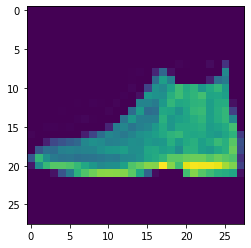

In [46]:
plt.imshow(Q_test[0])

In [51]:
np.argmax(w_test[0])

9

In [52]:
np.argmax(w_pred[0])

9

In [58]:
df2 = pd.DataFrame(data=['T-shirt/top','Trousers','pullover','Dress','coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'], index=range(0,10), columns=['Description'])
display(pd.DataFrame(df2))

,Description
0,T-shirt/top
1,Trousers
2,pullover
3,Dress
4,coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle Boot


**9=Ankel Boot로 잘 맞아 떨어진다.** 

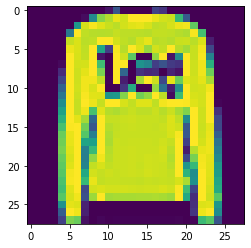

In [54]:
plt.imshow(Q_test[1])

In [55]:
np.argmax(w_test[1]), np.argmax(w_pred[1])

(2, 2)

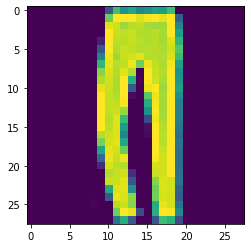

In [56]:
plt.imshow(Q_test[2])

In [57]:
np.argmax(w_test[2]), np.argmax(w_pred[2])

(1, 1)

**2 = 스웨터, 1 = 바지로 잘 맞아 떨어진다.** 

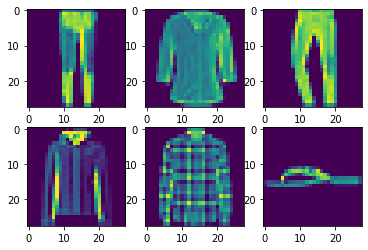

In [75]:
plt.subplot(231)
plt.imshow(Q_test[3])

plt.subplot(232)
plt.imshow(Q_test[4])

plt.subplot(233)
plt.imshow(Q_test[5])

plt.subplot(234)
plt.imshow(Q_test[6])

plt.subplot(235)
plt.imshow(Q_test[7])

plt.subplot(236)
plt.imshow(Q_test[8])

plt.show()

In [76]:
np.argmax(w_test[3]), np.argmax(w_pred[3]), np.argmax(w_test[4]), np.argmax(w_pred[4]),np.argmax(w_test[5]), np.argmax(w_pred[5])

(1, 1, 6, 6, 1, 1)

In [77]:
np.argmax(w_test[6]), np.argmax(w_pred[6]), np.argmax(w_test[7]), np.argmax(w_pred[7]), np.argmax(w_test[8]), np.argmax(w_pred[8])

(4, 4, 6, 6, 5, 5)

**(바지, 셔츠, 바지, 코트, 셔츠, 샌달)로 테스트 샘플 10가지 모두 일치하는 결과가 나타났습니다.**